In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def oracle():
    qc = QuantumCircuit(4)
    qc.x(0)
    qc.x(2)
    mcx = MCXGate(num_ctrl_qubits=3)
    qc.append(mcx, [0, 1, 2, 3])
    qc.x(0)
    qc.x(2)
    return qc

def diffusion_operator():
    qc = QuantumCircuit(4)
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    mcx = MCXGate(num_ctrl_qubits=3)
    qc.append(mcx, [0, 1, 2, 3])
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    return qc

def grover_3_qubits():
    n_bits = 3
    grover_circuit = QuantumCircuit(n_bits + 1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)

    # Calculate the number of iterations needed
    r = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_bits)))

    # Apply Grover's iterations
    for _ in range(r):
        grover_circuit.append(oracle().to_gate(), range(n_bits + 1))
        grover_circuit.append(diffusion_operator().to_gate(), range(n_bits + 1))

    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    return grover_circuit

# Create the circuit for Grover's algorithm
grover_circuit = grover_3_qubits()
grover_circuit.draw('mpl')

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend)
job = backend.run(transpiled_circuit)
result = job.result()

# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
print(counts)


ModuleNotFoundError: No module named 'qiskit_aer'

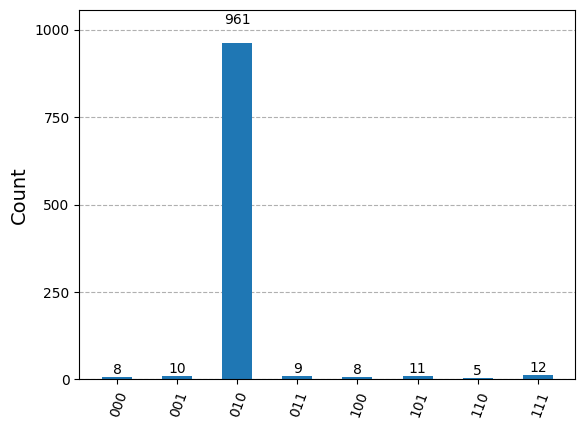

In [3]:
plot_histogram(counts)
plt.show()

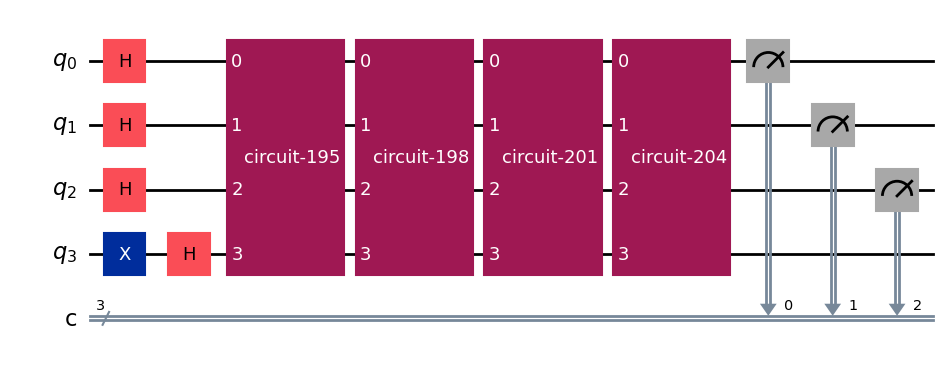

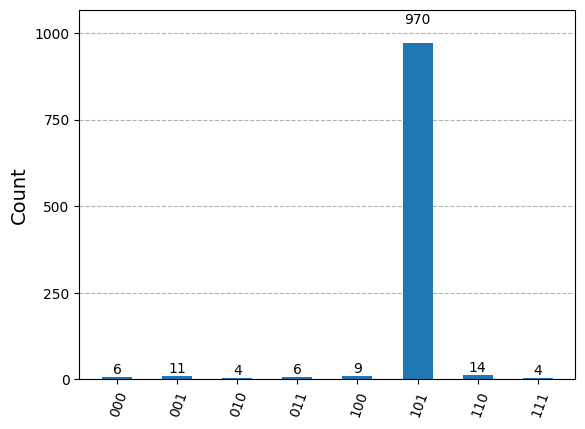

In [4]:
def oracle():
    qc = QuantumCircuit(4)
    qc.x(1)  # We apply X-gates to invert q1 making it 1
    mcx = MCXGate(num_ctrl_qubits=3)
    qc.append(mcx, [0, 1, 2, 3])
    qc.x(1)  # Flip back q1 after the multi-controlled gate
    return qc

def diffusion_operator():
    qc = QuantumCircuit(4)
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    mcx = MCXGate(num_ctrl_qubits=3)
    qc.append(mcx, [0, 1, 2, 3])
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    return qc

def grover_3_qubits():
    n_bits = 3
    grover_circuit = QuantumCircuit(n_bits + 1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)

    # Calculate the number of iterations needed
    r = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_bits)))

    # Apply Grover's iterations
    for _ in range(r):
        grover_circuit.append(oracle().to_gate(), range(n_bits + 1))
        grover_circuit.append(diffusion_operator().to_gate(), range(n_bits + 1))

    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    return grover_circuit

# Create the circuit for Grover's algorithm
grover_circuit = grover_3_qubits()
grover_circuit.draw('mpl')

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend)
job = backend.run(transpiled_circuit)
result = job.result()

# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
#print(counts)
plot_histogram(counts)
plt.show()

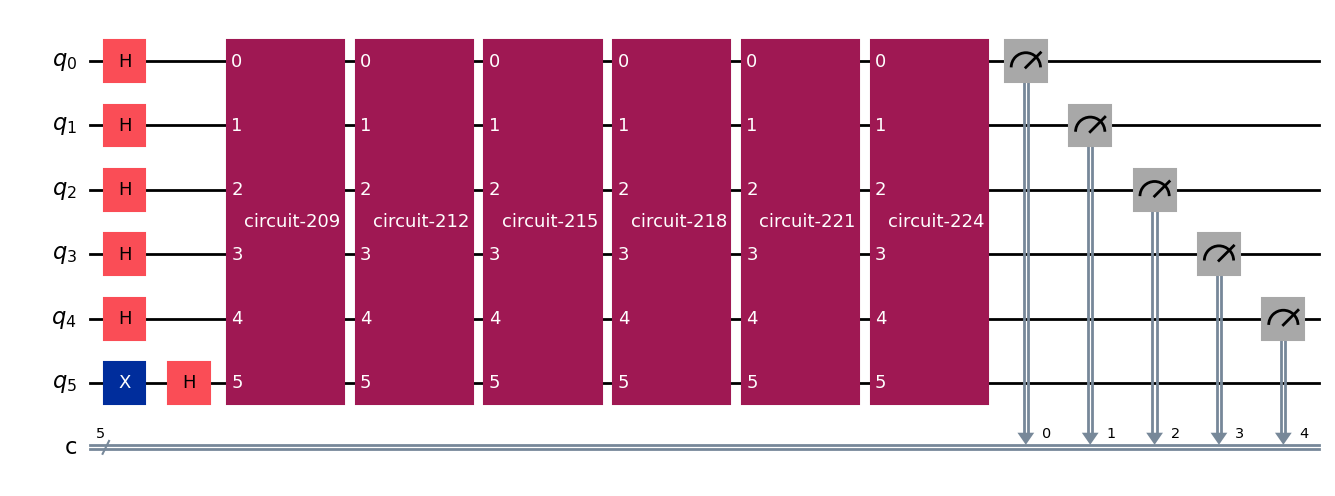

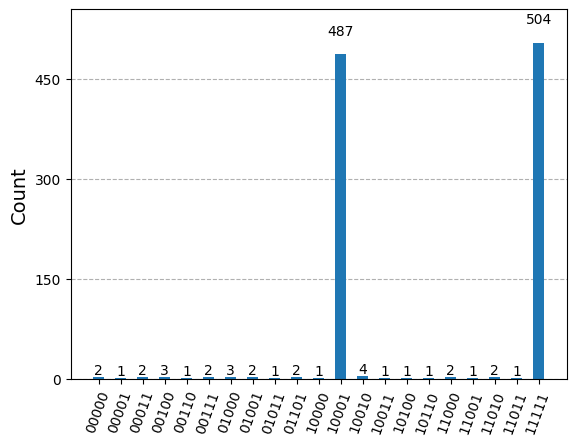

In [5]:
def oracle():
    qc = QuantumCircuit(6)

    # Mark state 11001
    qc.x([1, 2, 3])  # To target the state 11001
    qc.append(MCXGate(num_ctrl_qubits=5), [0, 1, 2, 3, 4, 5])
    qc.x([1, 2, 3])

    # Mark state 00001
    qc.append(MCXGate(num_ctrl_qubits=5), [0, 1, 2, 3, 4, 5])

    return qc

def diffusion_operator():
    qc = QuantumCircuit(6)
    qc.h([0, 1, 2, 3, 4])
    qc.x([0, 1, 2, 3, 4])
    qc.append(MCXGate(num_ctrl_qubits=5), [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 2, 3, 4])
    qc.h([0, 1, 2, 3, 4])
    return qc

def grover(n_bits, solutions):
    n_solutions = len(solutions)
    grover_circuit = QuantumCircuit(n_bits + 1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)

    # Calculate the number of iterations needed
    r = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_bits / n_solutions)))

    # Apply Grover's iterations
    for _ in range(r):
        grover_circuit.append(oracle().to_gate(), range(n_bits + 1))
        grover_circuit.append(diffusion_operator().to_gate(), range(n_bits + 1))

    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    return grover_circuit

# Define parameters
n_bits = 5
solutions = [[1, 1, 0, 0, 1], [0, 0, 0, 0, 1]]

# Create the circuit for Grover's algorithm
grover_circuit = grover(n_bits, solutions)
grover_circuit.draw('mpl')

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend)
job = backend.run(transpiled_circuit)
result = job.result()

# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
plot_histogram(counts)
plt.show()

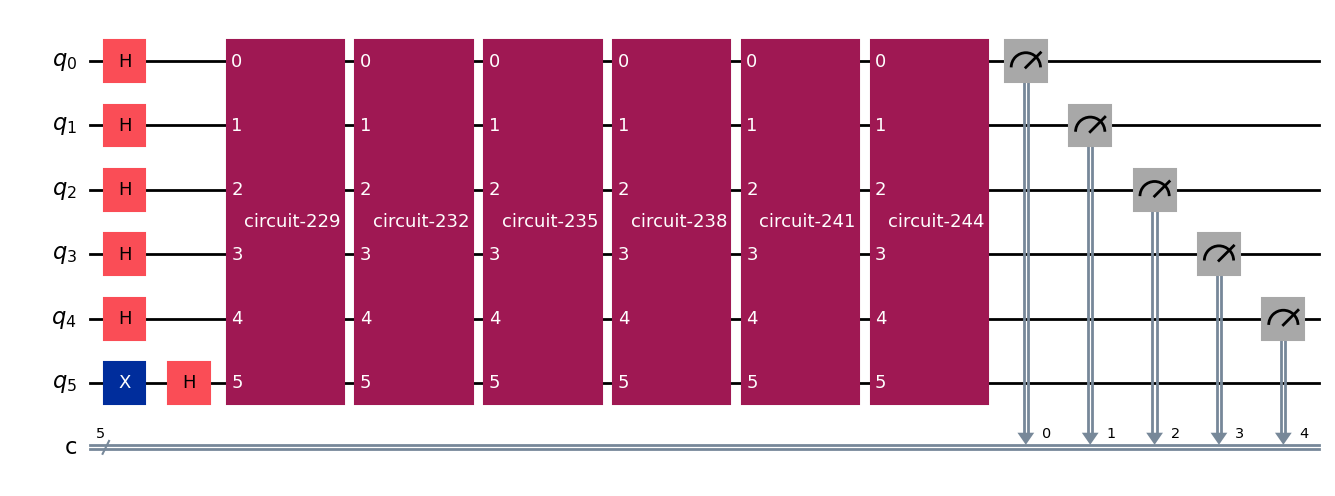

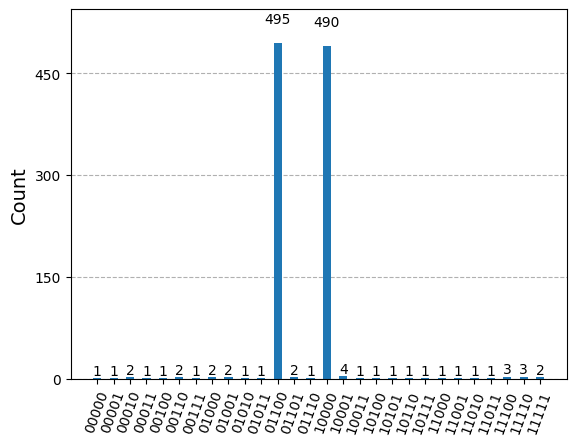

In [6]:
def oracle():
    qc = QuantumCircuit(6)

    # Mark state 11001
    qc.x([0, 1, 4])  # Apply X-gates to flip bit 1, 2, and 5
    mcx = MCXGate(num_ctrl_qubits=5)
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 4])  # Undo the X-gates

    # Mark state 00001
    qc.x([0, 1, 2, 3])  # Apply X-gates to the first four qubits
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 2, 3])  # Undo the X-gates

    return qc

def diffusion_operator():
    qc = QuantumCircuit(6)
    qc.h([0, 1, 2, 3, 4])
    qc.x([0, 1, 2, 3, 4])
    mcx = MCXGate(num_ctrl_qubits=5)
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 2, 3, 4])
    qc.h([0, 1, 2, 3, 4])
    return qc

def grover(n_bits, solutions):
    n_solutions = len(solutions)
    grover_circuit = QuantumCircuit(n_bits + 1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)

    # Calculate the number of iterations needed
    r = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_bits / n_solutions)))

    # Apply Grover's iterations
    for _ in range(r):
        grover_circuit.append(oracle().to_gate(), range(n_bits + 1))
        grover_circuit.append(diffusion_operator().to_gate(), range(n_bits + 1))

    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    return grover_circuit

# Define parameters
n_bits = 5
solutions = [[1, 1, 0, 0, 1], [0, 0, 0, 0, 1]]

# Create the circuit for Grover's algorithm
grover_circuit = grover(n_bits, solutions)
grover_circuit.draw('mpl')

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend)
job = backend.run(transpiled_circuit)
result = job.result()

# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
plot_histogram(counts)
plt.show()

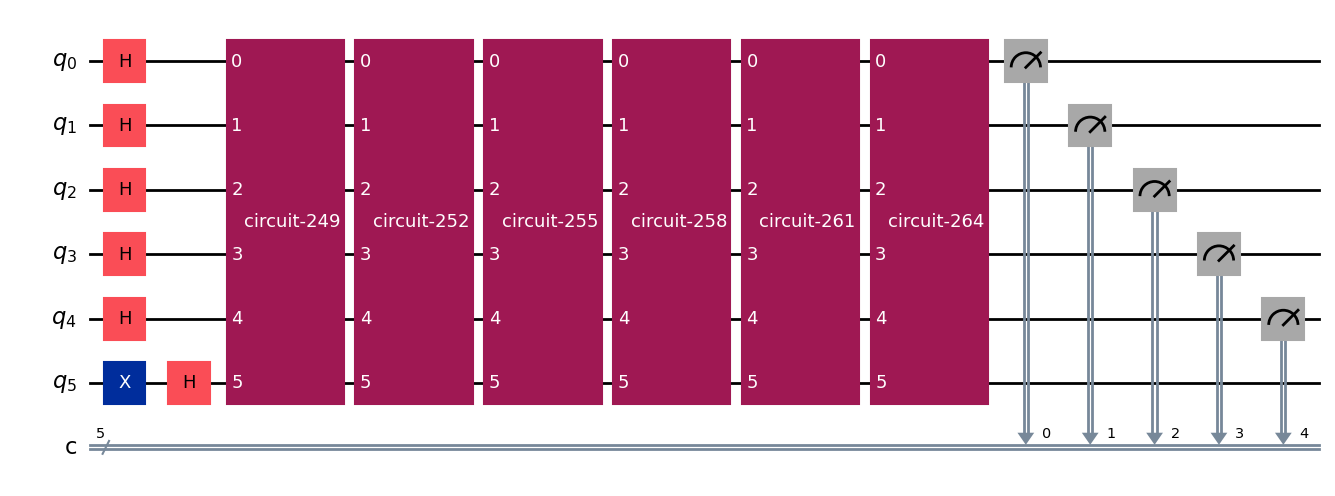

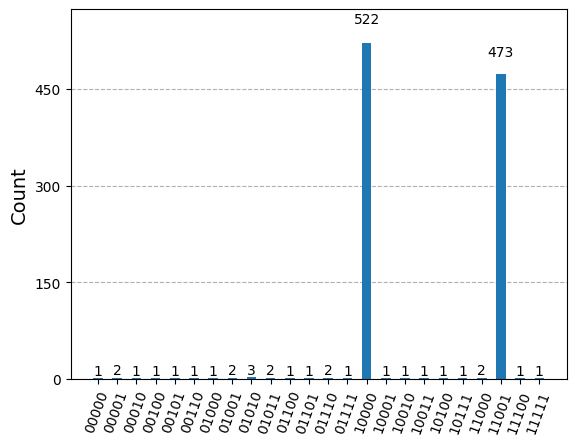

In [7]:
def oracle():
    qc = QuantumCircuit(6)

    # Mark state 11001 (qubits order reversed means [10011])
    qc.x([1, 2])  # Flip qubits 1 and 2
    mcx = MCXGate(num_ctrl_qubits=5)
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([1, 2])  # Undo flips

    # Mark state 00001 (qubits order reversed means [10000])
    qc.x([0, 1, 2, 3])  # Flip qubits 0, 1, 2, and 3
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 2, 3])  # Undo flips

    return qc

def diffusion_operator():
    qc = QuantumCircuit(6)
    qc.h([0, 1, 2, 3, 4])
    qc.x([0, 1, 2, 3, 4])
    mcx = MCXGate(num_ctrl_qubits=5)
    qc.append(mcx, [0, 1, 2, 3, 4, 5])
    qc.x([0, 1, 2, 3, 4])
    qc.h([0, 1, 2, 3, 4])
    return qc

def grover(n_bits, solutions):
    n_solutions = len(solutions)
    grover_circuit = QuantumCircuit(n_bits + 1, n_bits)

    # Initialize the qubits to a uniform superposition state
    grover_circuit.h(range(n_bits))
    grover_circuit.x(n_bits)
    grover_circuit.h(n_bits)

    # Calculate the number of iterations needed
    r = int(np.floor(np.pi / 4 * np.sqrt(2 ** n_bits / n_solutions)))

    # Apply Grover's iterations
    for _ in range(r):
        grover_circuit.append(oracle().to_gate(), range(n_bits + 1))
        grover_circuit.append(diffusion_operator().to_gate(), range(n_bits + 1))

    # Measure the qubits
    grover_circuit.measure(range(n_bits), range(n_bits))
    return grover_circuit

# Define parameters
n_bits = 5
solutions = [[1, 1, 0, 0, 1], [0, 0, 0, 0, 1]]

# Create the circuit for Grover's algorithm
grover_circuit = grover(n_bits, solutions)
grover_circuit.draw('mpl')

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend)
job = backend.run(transpiled_circuit)
result = job.result()

# Get the counts of the measurement results
counts = result.get_counts(grover_circuit)

# Print and plot the results
plot_histogram(counts)
plt.show()